In [1]:
import tweepy
import numpy as np
import json

import pandas as pd
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# user= "@BBC"
# public_tweet = api.user_timeline(user, count =20)
# print(json.dumps(public_tweet, sort_keys=True, indent = 4))

In [13]:
#target users
# print(public_tweet["statuses"][0]["text"])
targetusers = ["@BBC","@CBS","@CNN", "@FoxNews", "@nytimes"]

compound_list =[]
positive_list =[]
negative_list= []
neutral_list=[]
tweets_ago=[]
user_account=[]
tweet=[]
tweet_date=[]

In [14]:
for term in targetusers:
    counter =0
    
    for x in range(5):
        
        public_tweets = api.user_timeline(term, page=x)     
        
        
        for tweets in public_tweets:
            counter += 1
            user_account.append(term)
            tweet.append(tweets["text"])
            tweet_date.append(tweets["created_at"])
            tweets_ago.append(counter)
            

            compound = analyzer.polarity_scores(tweets["text"])["compound"]
            pos = analyzer.polarity_scores(tweets["text"])["pos"]
            neu = analyzer.polarity_scores(tweets["text"])["neu"]
            neg = analyzer.polarity_scores(tweets["text"])["neg"]
#             createdat = tweets["created_at"]
            
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
          
                             
            

In [15]:
sentiment_dic= {"Source": user_account,
                "Tweet": tweet,
                "Date": tweet_date,
                "Compound Analysis": compound_list,
                "Positive": positive_list,
                "Negative": negative_list,
                "Neutral": neutral_list,
                "Tweets Ago": tweets_ago}
            

In [17]:
# @MSNBC @TheDemocrats and the @DNC ARE evil people!!  
# And so is the #FakeNewsMedia like @MSNBC @NBCNews @CNN @CBS… https://t.co/X4o4AKwX3n

sentiments_pd = pd.DataFrame.from_dict(sentiment_dic)
sentiments_pd.count()
# print(sentiment_dic)

Source               500
Tweet                500
Date                 500
Compound Analysis    500
Positive             500
Negative             500
Neutral              500
Tweets Ago           500
dtype: int64

In [28]:
sentiments_pd.to_csv('Resources/news_analysis.csv')

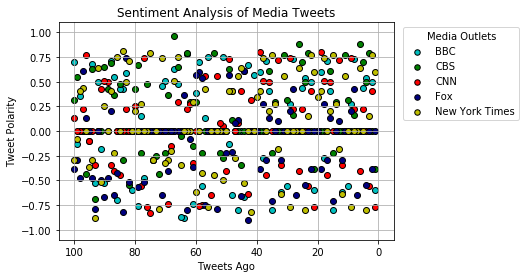

In [51]:
bbc = sentiments_pd.loc[sentiments_pd["Source"] == "@BBC"]
cbs = sentiments_pd.loc[sentiments_pd["Source"] == "@CBS"]
cnn = sentiments_pd.loc[sentiments_pd["Source"] == "@CNN"]
fox = sentiments_pd.loc[sentiments_pd["Source"] == "@FoxNews"]
nyt = sentiments_pd.loc[sentiments_pd["Source"] == "@nytimes"]


plt.scatter(bbc["Tweets Ago"], bbc["Compound Analysis"], c='c', edgecolor='k', label='BBC')
plt.scatter(cbs["Tweets Ago"], cbs["Compound Analysis"], c='g', edgecolor='k', label='CBS')
plt.scatter(cnn["Tweets Ago"], cnn["Compound Analysis"], c='r', edgecolor='k', label='CNN')
plt.scatter(fox["Tweets Ago"], fox["Compound Analysis"], c='navy', edgecolor='k', label='Fox')
plt.scatter(nyt["Tweets Ago"], nyt["Compound Analysis"], c='y', edgecolor='k', label='New York Times')

#setting plot aesthetics
#legend

plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.xlim(105, -5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.grid(True)

# legend= plt.legend(title= "Media Source", bbox_to_anchor=(1, 0.95))
# plt.legend(bbox_to_anchor = (1,1),
#            frameon = True, 
#            edgecolor = 'black', 
#            facecolor = 'white',
#            title = "Media Outlet")
lgnd= plt.legend(bbox_to_anchor=(1.39, 1), loc="upper right", scatterpoints=1, fontsize=10, title="Media Outlets")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]

# legend= plt.legend(bbox_to_anchore=(1,1), title="Media Sources", fontsize="medium")
plt.savefig('Graphs(PNG)/tweets_scatter.png', bbox_inches = 'tight')
plt.show()

In [56]:
# Group the data by media outlet
groupedmedia = sentiments_pd.groupby(["Source"], as_index=False)
#groupedmedia.head()


# Get the average Compound sentiment
avgcomp_analysis = groupedmedia["Compound Analysis"].mean()
avgcomp_analysis.head()

,Source,Compound Analysis
0,@BBC,0.049849
1,@CBS,0.149783
2,@CNN,0.030733
3,@FoxNews,-0.125063
4,@nytimes,0.077401


In [58]:
bar_outlets = avgcomp_analysis["Source"]
bar_Compound = avgcomp_analysis["Compound Analysis"]
x_axis = np.arange(0, len(bar_Compound), 1)

Text(0,0.5,'Tweet Polarity')

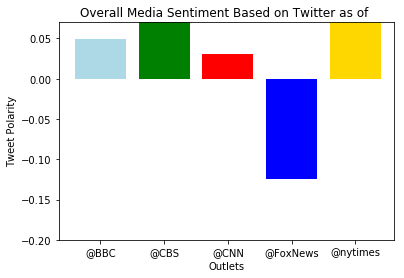

In [66]:
plt.bar(x_axis, bar_Compound, color=["lightblue","green","red","blue","gold"], align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, bar_outlets)


# Set the limits of the x axis
plt.xlim(-0.25, len(x_axis))

# Set the limits of the y axis
plt.ylim(-.2, 0.07)

plt.title(f"Overall Media Sentiment Based on Twitter as of ")
plt.xlabel("Outlets")
plt.ylabel("Tweet Polarity")

In [63]:

plt.savefig("Graphs(PNG)/BarSentiment.png")
plt.show()


<Figure size 432x288 with 0 Axes>